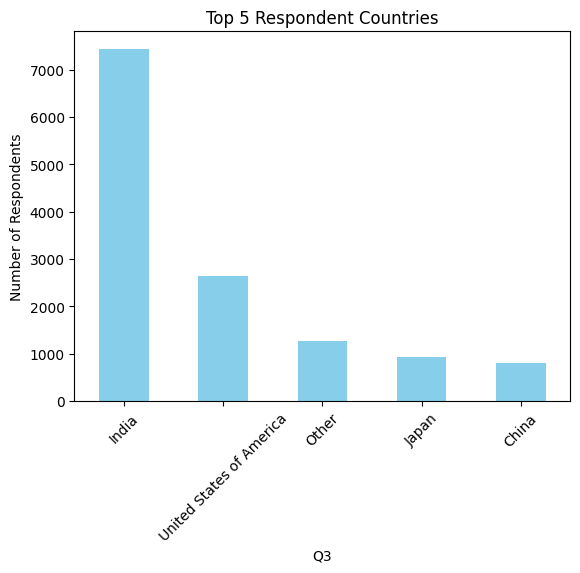

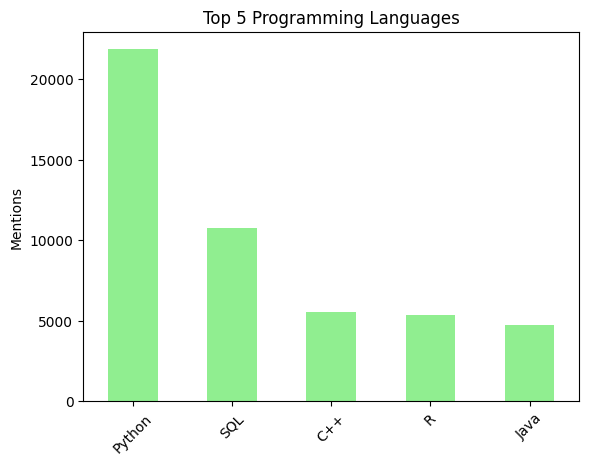

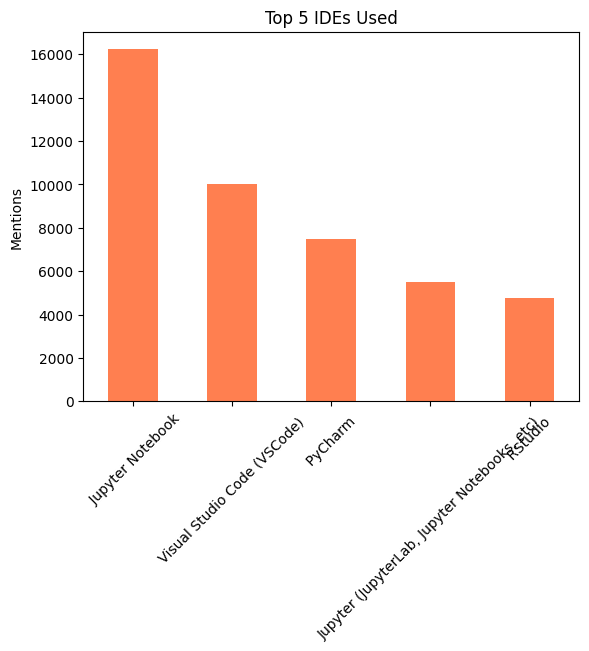

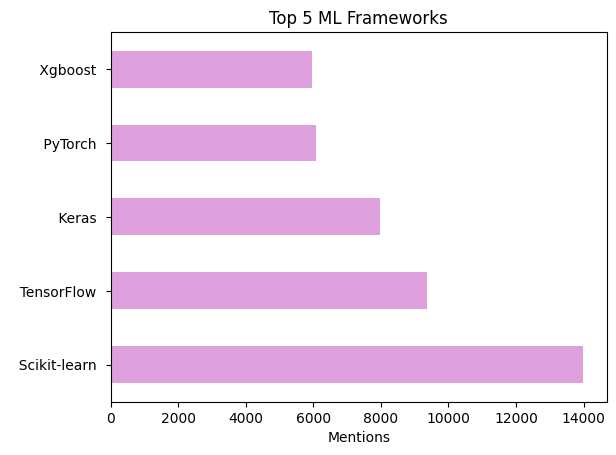

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


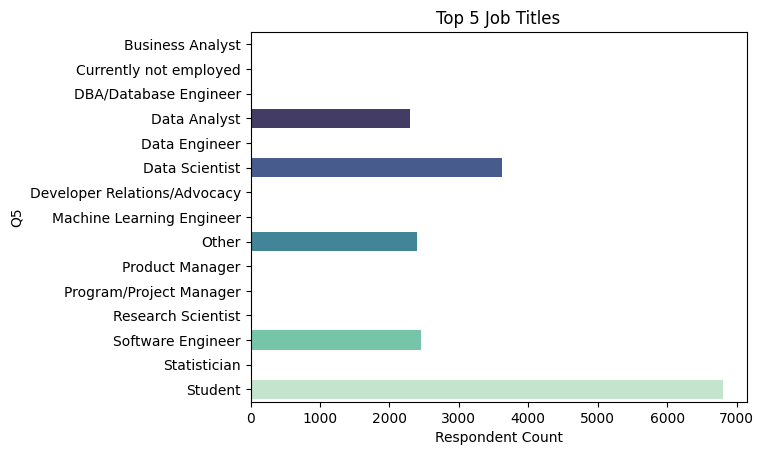

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (skip header row)
df = pd.read_csv('/kaggle/input/kaggle-survey-2021-responses/kaggle_survey_2021_responses.csv', low_memory=False)
df = df.iloc[1:]  # Remove first row with questions

# Clean column names
df.columns = df.columns.str.strip().str.replace('\n', ' ')

# Fill missing values
df.fillna("Not Answered", inplace=True)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Convert select categorical columns
for col in ['Q3', 'Q5', 'Q6']:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Insight 1: Top 5 Countries
top_countries = df['Q3'].value_counts().head(5)
top_countries.plot(kind='bar', title='Top 5 Respondent Countries', color='skyblue')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

# Insight 2: Top Programming Languages (Q7_Part_*)
lang_cols = [col for col in df.columns if "Q7_Part" in col]
langs = pd.Series(df[lang_cols].values.ravel()).value_counts().drop("Not Answered").head(5)
langs.plot(kind='bar', title='Top 5 Programming Languages', color='lightgreen')
plt.ylabel("Mentions")
plt.xticks(rotation=45)
plt.show()

# Insight 3: Top IDEs (Q9_Part_*)
ide_cols = [col for col in df.columns if "Q9_Part" in col]
ides = pd.Series(df[ide_cols].values.ravel()).value_counts().drop("Not Answered").head(5)
ides.plot(kind='bar', title='Top 5 IDEs Used', color='coral')
plt.ylabel("Mentions")
plt.xticks(rotation=45)
plt.show()

# Insight 4: ML Frameworks (Q16_Part_*)
ml_cols = [col for col in df.columns if "Q16_Part" in col]
ml_tools = pd.Series(df[ml_cols].values.ravel()).value_counts().drop("Not Answered").head(5)
ml_tools.plot(kind='barh', title='Top 5 ML Frameworks', color='plum')
plt.xlabel("Mentions")
plt.show()

# Insight 5: Job Titles (Q5)
job_roles = df['Q5'].value_counts().head(5)
sns.barplot(x=job_roles.values, y=job_roles.index, palette="mako")
plt.title("Top 5 Job Titles")
plt.xlabel("Respondent Count")
plt.show()

# Optional: Save cleaned dataset
df.to_csv("cleaned_kaggle_survey_2021.csv", index=False)
